In [1]:
from validation_run import *


Python Platform: macOS-12.6.2-arm64-arm-64bit
python version: 3.10.9 (main, Dec 15 2022, 10:44:50) [Clang 14.0.0 (clang-1400.0.29.202)]
torch version: 2.0.0.dev20221220
numpy version: 1.23.5
pandas version: 1.5.2
mps
Adjusting learning rate of group 0 to 1.0000e-03.


In [2]:
from parameters import meta


def create():
    dictionary = {}
    for key in range(len(meta.DICT_LAYERS)): 
        dictionary[f'dice_{meta.DICT_LAYERS[key]}'] = 0
    
    return dictionary


created_dict = create()
print(created_dict)

for i in range(5):
    created_dict[f'dice_{meta.DICT_LAYERS[3]}'] += 1
    print(created_dict)
    
print(created_dict.get(f'dice_{meta.DICT_LAYERS[3]}'))




{'dice_Background': 0, 'dice_Left_Ventricle': 0, 'dice_Myocardium': 0, 'dice_Fibrosis': 0}
{'dice_Background': 0, 'dice_Left_Ventricle': 0, 'dice_Myocardium': 0, 'dice_Fibrosis': 1}
{'dice_Background': 0, 'dice_Left_Ventricle': 0, 'dice_Myocardium': 0, 'dice_Fibrosis': 2}
{'dice_Background': 0, 'dice_Left_Ventricle': 0, 'dice_Myocardium': 0, 'dice_Fibrosis': 3}
{'dice_Background': 0, 'dice_Left_Ventricle': 0, 'dice_Myocardium': 0, 'dice_Fibrosis': 4}
{'dice_Background': 0, 'dice_Left_Ventricle': 0, 'dice_Myocardium': 0, 'dice_Fibrosis': 5}
5


In [3]:
counted_parameters = tm.image_metrics()

main_stats_lv = tm.main_stat_parameters(counted_parameters[0])
main_stats_myo = tm.main_stat_parameters(counted_parameters[1])
main_stats_fib = tm.main_stat_parameters(counted_parameters[2])

print(f'Precision_FIB: {counted_parameters[3]}, Recall_FIB: {counted_parameters[4]}, Accuracy: {counted_parameters[5]}')
print(f'Median_LV: {main_stats_lv[0]} || Mean_LV: {main_stats_lv[1]} || Std_LV: {main_stats_lv[2]}')
print(f'Median_MYO: {main_stats_myo[0]} || Mean_MYO: {main_stats_myo[1]} || Std_MYO: {main_stats_myo[2]}')
print(f'Median_FIB: {main_stats_fib[0]} || Mean_FIB: {main_stats_fib[1]} || Std_FIB: {main_stats_fib[2]}')

Precision_FIB: 0.7, Recall_FIB: 0.76, Accuracy: 0.98
Median_LV: 0.95 || Mean_LV: 0.92 || Std_LV: 0.15
Median_MYO: 0.85 || Mean_MYO: 0.8 || Std_MYO: 0.16
Median_FIB: 0.73 || Mean_FIB: 0.67 || Std_FIB: 0.25


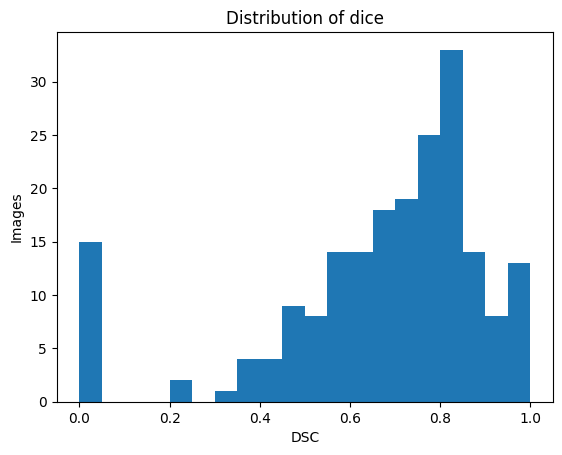

In [4]:
# create_hist(counted_parameters[0])
# create_hist(counted_parameters[1])
# create_hist(stats_fib)
create_hist(counted_parameters[2])

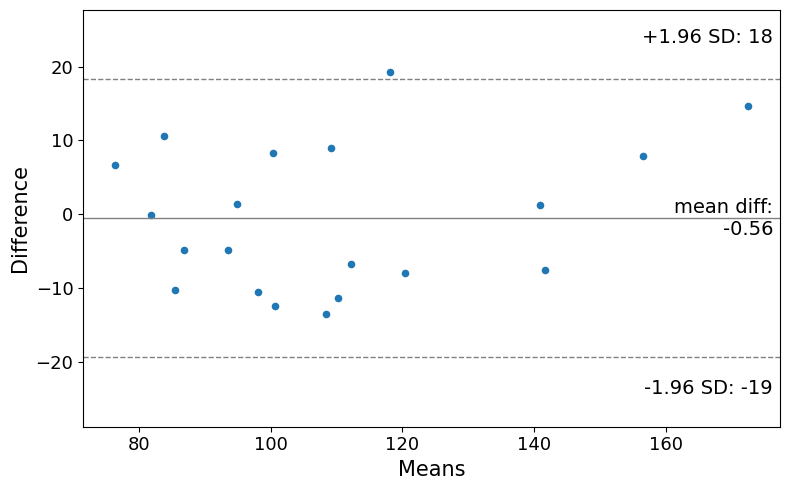

In [5]:
# #Differnce per subject between ground truth and computed mask for myocardium
df = pd.DataFrame(
    {
        'A': GT_myo, 
        'B': CM_myo,
        'C': GT_fib, 
        'D': CM_fib,
        'E': true_Myo_vol, 
        'F': Myo_vol,
        'G': true_Fib_vol, 
        'H': Fib_vol,
    },
)

f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(df.A, df.B, ax = ax)
plt.show()

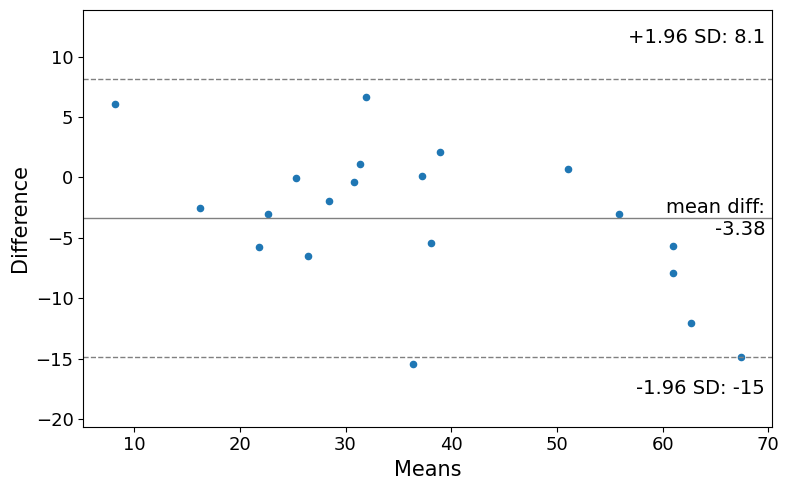

In [6]:
# #Differnce per subject between ground truth and computed mask for fibrois
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(df.C, df.D, ax = ax)
plt.show()

In [7]:
# tm.image_contrast()

/Users/aglevchuk/Documents/PycharmProjects/Unet_Cardiac/CascadeCardioUnet/validation_run.py:77: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  predicted_masks[10][i][predicted_masks[10][i] == 3]= 2


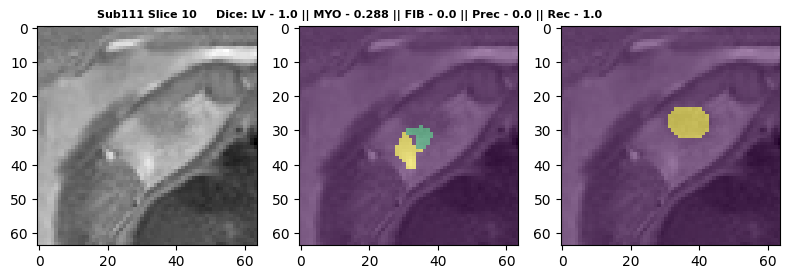

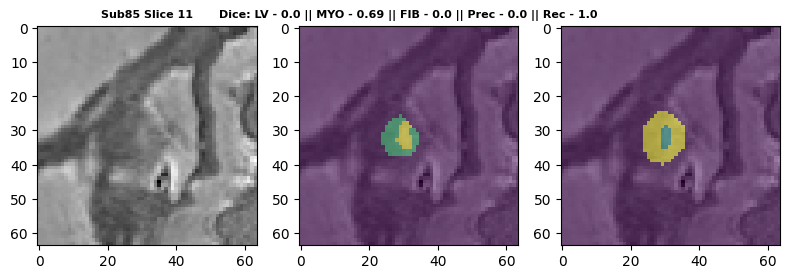

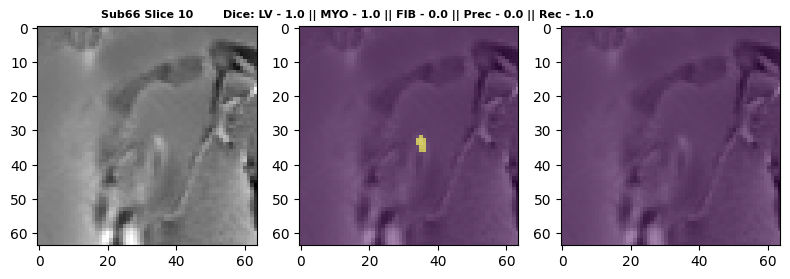

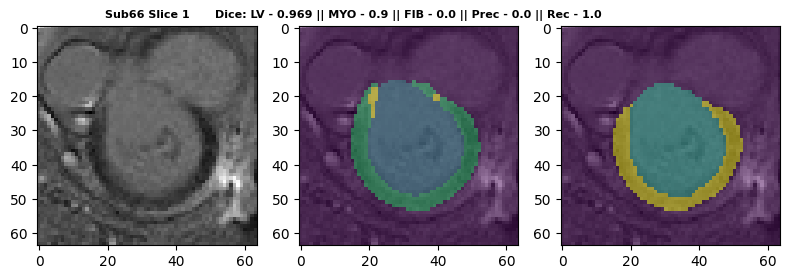

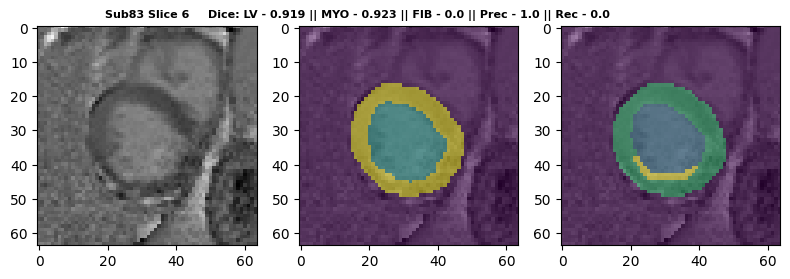

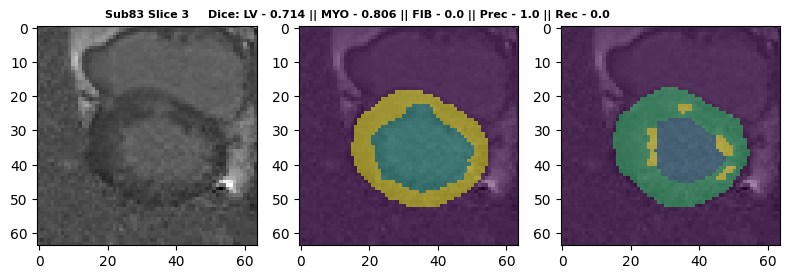

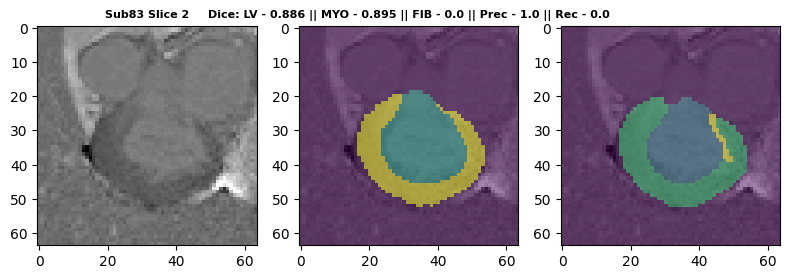

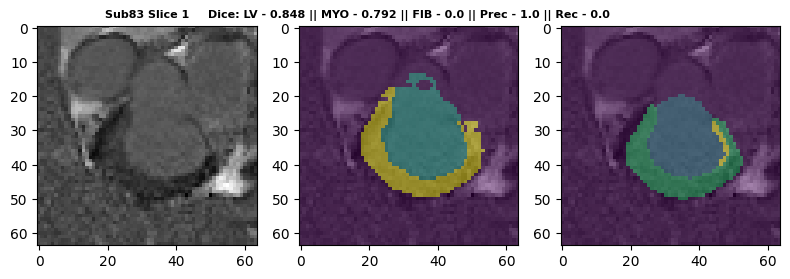

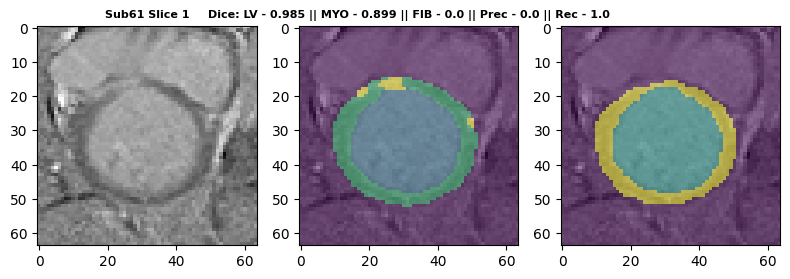

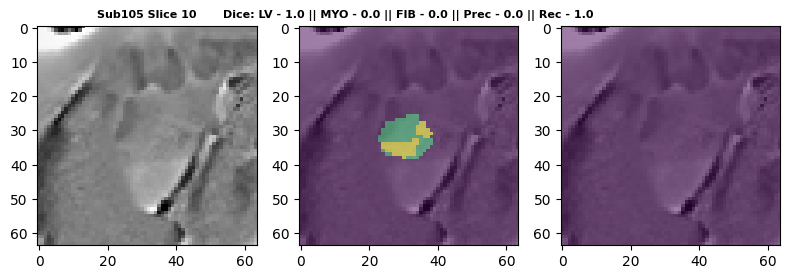

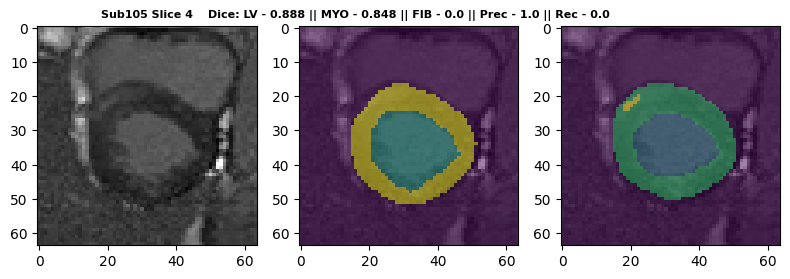

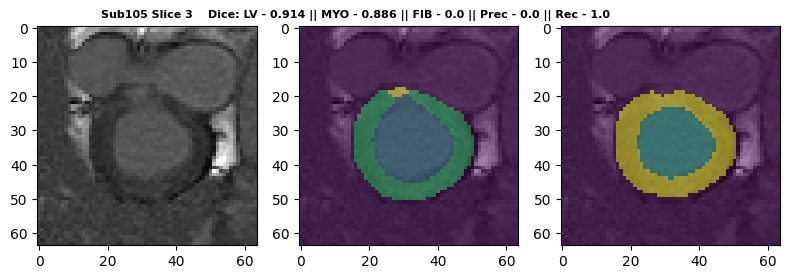

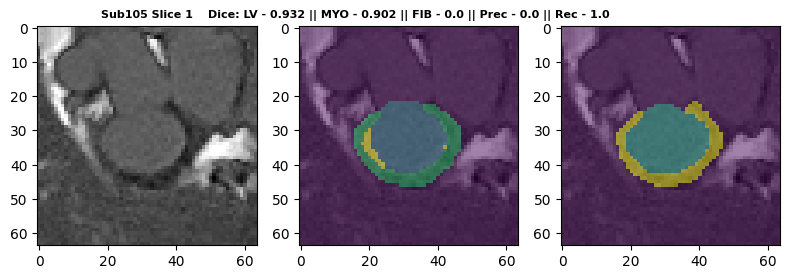

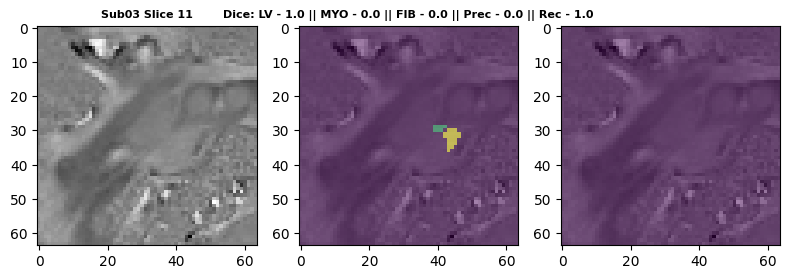

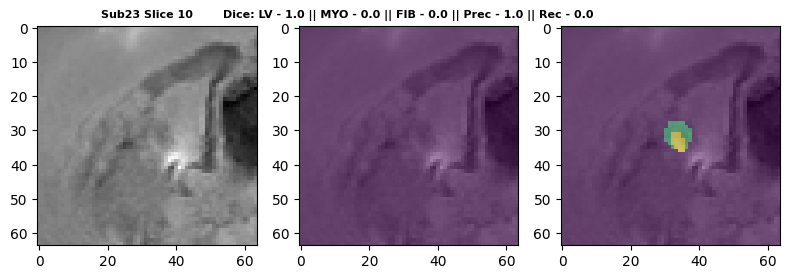

In [8]:
PlotResults().make_predictions(show_predicted_masks)

In [9]:
# log_file = open(f'{meta.PROJ_NAME}_log.txt', 'r')  #meta.CROPP_PROJ_NAME
# epoch_list = []
# train_loss_list, train_acc_list, train_dice_lv_list, train_dice_myo_list, train_dice_fib_list = [],[],[],[],[]
# valid_loss_list, valid_acc_list, valid_dice_lv_list, valid_dice_myo_list, valid_dice_fib_list = [],[],[],[],[]
# valid_dice_list, train_dice_list, test_dice_list = [],[], []

# try:
#     for row in log_file.read().split('\n'):
#         row_list = row.split(',')
#         epoch_list.append(row_list[0])
        
#         train_loss_list.append(float(row_list[1]))
#         train_acc_list.append(float(row_list[2]))
#         train_dice_lv_list.append(float(row_list[3]))
#         train_dice_myo_list.append(float(row_list[4]))
#         train_dice_fib_list.append(float(row_list[5]))
#         train_dice_list.append((float(row_list[3])+float(row_list[4])+float(row_list[5]))/3)
        
#         valid_loss_list.append(float(row_list[6]))
#         valid_acc_list.append(float(row_list[7]))
#         valid_dice_lv_list.append(float(row_list[8]))
#         valid_dice_myo_list.append(float(row_list[9]))
#         valid_dice_fib_list.append(float(row_list[10]))
#         valid_dice_list.append((float(row_list[8])+float(row_list[9])+float(row_list[10]))/3)
        
# except IndexError:
#     print('finish')

# fig, ax = plt.subplots()
# ax.plot(train_loss_list, label = 'Train_loss: ' + str(round(train_loss_list[-1], 3)))
# ax.plot(valid_loss_list, label = 'Valid_loss: ' + str(round(valid_loss_list[-1], 3)))

# ax.legend(fontsize=15, 
#           ncol = 1,
#           loc = 'center right',
#           shadow = 'True')
# fig.set_figheight(6)
# fig.set_figwidth(12)

# ax.minorticks_on()
# ax.grid(which='major',
#         color = 'k', 
#         linewidth = 2)
# ax.grid(which='minor', 
#         color = 'k', 
#         linestyle = ':')

# plt.title("Loss graphic", fontsize= 19, fontweight='bold')
# plt.xlabel("Epoche", fontsize= 19)
# plt.ylabel("Loss", fontsize= 19)
# plt.rcParams.update({'font.size': 18})
# plt.show()

In [10]:
# fig, ax = plt.subplots()
# ax.plot(train_acc_list, label = 'Train_accuracy: ' + str(round(train_acc_list[-1], 3)))
# ax.plot(valid_acc_list, label = 'Valid_accuracy: ' + str(round(valid_acc_list[-1], 3)))

# ax.legend(fontsize=15, 
#           ncol = 1,
#           loc = 'upper left',
#           shadow = 'True')
# fig.set_figheight(6)
# fig.set_figwidth(12)

# ax.minorticks_on()
# ax.grid(which='major',
#         color = 'k', 
#         linewidth = 2)
# ax.grid(which='minor', 
#         color = 'k', 
#         linestyle = ':')

# plt.title("Mean Dice", fontsize= 19, fontweight='bold')
# plt.xlabel("Epoche", fontsize= 18)
# plt.ylabel("Dice", fontsize= 19)
# plt.rcParams.update({'font.size': 18})
# plt.show()

In [11]:
# fig, ax = plt.subplots()
# ax.plot(train_dice_lv_list, label = 'Train_dice_LV: ' + str(round(train_dice_lv_list[-1], 3)))
# ax.plot(train_dice_myo_list, label = 'Train_dice_MYO: ' + str(round(train_dice_myo_list[-1], 3)))
# ax.plot(train_dice_fib_list, label = 'Train_dice_FIB: ' + str(round(train_dice_fib_list[-1], 3)))

# ax.plot(valid_dice_lv_list, label = 'Valid_dice_LV: ' + str(round(valid_dice_lv_list[-1], 3)))
# ax.plot(valid_dice_myo_list, label = 'Valid_dice_MYO: ' + str(round(valid_dice_myo_list[-1], 3)))
# ax.plot(valid_dice_fib_list, label = 'Valid_dice_FIB: ' + str(round(valid_dice_fib_list[-1], 3)))

# ax.legend(fontsize=15,
#           ncol = 3,
#           loc = 'center left')
# fig.set_figheight(6)
# fig.set_figwidth(12)

# ax.minorticks_on()
# ax.grid(which='major',
#         color = 'k',
#         linewidth = 2)
# ax.grid(which='minor',
#         color = 'k',
#         linestyle = ':')

# plt.title("Dice metrics", fontsize= 19, fontweight='bold')
# plt.xlabel("Epoche", fontsize= 19)
# plt.ylabel("Dice value", fontsize= 19)
# plt.rcParams.update({'font.size': 18})
# plt.show()

In [12]:
def pixel_count(loader_):
    size = len(loader_.dataset)

    summ_3layers, back_pr, lv_pr, myo_pr, fib_pr = 0,0,0,0,0

    for inputs, labels, sub_names in loader_:
        inputs, labels, sub_names = inputs.to(device), labels.to(device), list(sub_names)
        labels = torch.argmax(labels, dim=1)

        shp = labels.shape

        for i in range(shp[0]):
            
            back = (labels==0)
            labe_lv = (labels==1)
            labe_myo = (labels==2)
            labe_fib = (labels==3)
            tromb = (labels==4)

            summ_3layers = labe_lv[i].sum().item() + labe_myo[i].sum().item() + labe_fib[i].sum().item() #18432 +
            summ_4layers = back.sum().item() + labe_lv.sum().item() + labe_myo.sum().item() + labe_fib.sum().item() #18432 +

            if summ_3layers != 0:
                back_pr += back.sum().item()/summ_4layers*100  #(18432 +
                lv_pr += labe_lv.sum().item()/summ_4layers*100
                myo_pr += labe_myo.sum().item()/summ_4layers*100
                fib_pr += labe_fib.sum().item()/summ_4layers*100
            else:
                size -= 1

            # print(labe_lv[i].sum().item(), labe_myo[i].sum().item(), labe_fib[i].sum().item())
            
    back_pr = round(back_pr/size, 2)
    lv_pr = round(lv_pr/size, 2)
    myo_pr = round(myo_pr/size, 2)
    fib_pr = round(fib_pr/size, 2)

    # print(f'Back: {back_pr}% | LV: {lv_pr}% | Myo: {myo_pr}% | Fib: {fib_pr}%')
    print(f'BG: {back_pr} | LV: {lv_pr}% | Myo: {myo_pr}% | Fib: {fib_pr}%')

In [13]:
pixel_count(test_loader)

BG: 75.01 | LV: 13.96% | Myo: 8.3% | Fib: 2.73%


In [14]:
# pixel_count(train_loader)

In [15]:
# from torchsummary import summary
# model = Net(dropout, init_features).to('cpu')
# summary(model,input_size=(1,112,112))

In [16]:

# import torchviz

# device = torch.device('cpu')
# model = Net(drop=dropout, init_features=init_features).to(device)

# X = torch.rand (1, 1, 144, 144)
# torchviz.make_dot(model(X),  
#                   params = dict(model.named_parameters()) )

In [17]:
# from torchsummary import summary
# model = Net(dropout, init_features).to('cpu')
# summary(model,input_size=(1,112,112))

In [18]:
# from torch.utils.tensorboard import SummaryWriter

# writer=SummaryWriter('/Users/aglevchuk/Documents/PycharmProjects/Unet_Cardiac/TEST/content/logsdir')

In [19]:
# import torch
# from torch import nn
# from torchviz import make_dot

# x = torch.randn(1, 1, 192, 192).requires_grad_(True)
# y = model(x)

# make_dot(y, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")
# vise_graph = make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))
# vise_graph.view()

In [20]:
# import torch
# from torch import nn
# from torchviz import make_dot, make_dot_from_trace

# x = Variable(torch.randn(1,1,192,192))
# y = model(x)

# make_dot(y.mean(), params=dict(model.named_parameters()))  # Directly in iPython Notebook

# dot=make_dot(y.mean(), params=dict(model.named_parameters()))
# dot.render("model.pdf", view=False)  # Save as PDF

In [21]:
# import torch
# import torchvision.transforms as T

# # Create two fake images (identical for test purposes):
# image = torch.randn((3, 12, 12))
# target = image.clone()

# print(image)

# # This is the trick (concatenate the images):
# both_images = torch.cat((image.unsqueeze(0), target.unsqueeze(0)),0)

# # Apply the transformations to both images simultaneously:
# transformed_images = T.RandomRotation(180)(both_images)

# # Get the transformed images:
# image_trans = transformed_images[0]
# target_trans = transformed_images[1]

# # Compare the transformed images:
# torch.all(image_trans == target_trans).item()

In [22]:
# # Создание примера матрицы
# matrix = np.array([[4, 6, 6, 6, 7],
#                    [1, 5, 2, 4, 6],
#                    [1, 6, 2, 2, 2],
#                    [1, 2, 2, 3, 2],
#                    [8, 6, 2, 10, 10]])

# # Подсчет количества элементов, равных 6 и имеющих одинаковых соседей справа и снизу
# # count = np.count_nonzero((matrix[:-1, :-1] == matrix[1:, :-1]) & (matrix[:-1, :-1] == matrix[:-1, 1:]) & (matrix[:-1, :-1] == 6))
  
# count = np.count_nonzero((matrix[:-1, :] == matrix[1:, :]) & (matrix[:-1, :] == 6))

# # count = np.count_nonzero((matrix[:-1, :] == 6) | (matrix[1:, :] == 6) | (matrix[:, :-1] == 6) | (matrix[:, 1:] == 6))

# # Вывод результатов
# print("Количество элементов, равных 6 и имеющих одинаковых соседей справа и снизу:")
# # print((matrix[:-1, :] == matrix[1:, :]) & (matrix[:-1, :] == 6))
# print((matrix[:, :-1] == matrix[:, -1:]) & (matrix[:, -1:] == 6))

# # matrix[(matrix[:-1, :] == matrix[-1:, :]) & (matrix[:-1, :] == 6)] = 0

The equation of regression line is slope=0.848x+16.976.
Pearson's product-moment correlation coefficient is 0.9323.
p-value is 0.0000.
r: 0.9323, p-value: 0.0000


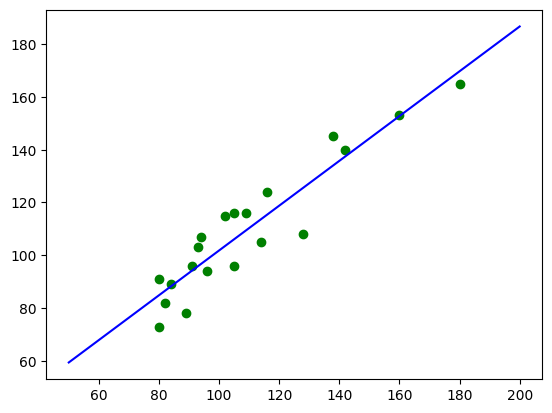

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
import statsmodels.api as sm


df = pd.DataFrame(
    [
        true_Myo_vol, 
        Myo_vol,
        # true_Fib_vol, 
        # Fib_vol,
    ],
    index=['true_Myo_vol','Myo_vol']
    # index=['GT_myo','CM_myo']
)

# Means
gain_mean, loss_mean = df.T.mean()
# Standard deviations
gain_std, loss_std = df.T.std(ddof = 1)
# Covariance
cov_xy = df.T.cov()
# Pearson correlation coefficient
cov_xy.iloc[0, 1] / (gain_std * loss_std)
data_t = df.T

# print(data_t)

df_x = data_t.iloc[ : , 0] 
# print(df_x) # 5,7,12,16,20
df_y = data_t.iloc[ : , 1]
# print(df_y) # 4,12,18,21,24
slope, intercept, r_value, p_value, std_err = linregress(df_x, df_y)

print(f'The equation of regression line is slope={slope:.3f}x+{intercept:.3f}.')
print(f'Pearson\'s product-moment correlation coefficient is {r_value:.4f}.')
print(f'p-value is {p_value:.4f}.')

r, pval = pearsonr(df_x, df_y)
print(f'r: {r:.4f}, p-value: {pval:.4f}')

X_plot = np.linspace(50, 200, 50)
Y_plot = slope * X_plot + intercept

plt.scatter(df_x, df_y, color = 'green')
plt.plot(X_plot, Y_plot, color = 'b')
plt.show()
r, pval = pearsonr(df_x, df_y)

The equation of regression line is slope=1.158x+-2.168.
Pearson's product-moment correlation coefficient is 0.9571.
p-value is 0.0000.
r: 0.9571, p-value: 0.0000


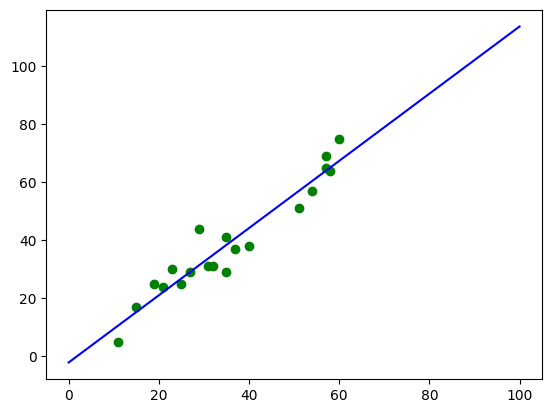

In [24]:
df = pd.DataFrame(
    [
        # true_Myo_vol, 
        # Myo_vol,
        true_Fib_vol, 
        Fib_vol,
    ],
    index=['true_Fib_vol','Fib_vol']
    # index=['GT_myo','CM_myo']
)

# Means
gain_mean, loss_mean = df.T.mean()
# Standard deviations
gain_std, loss_std = df.T.std(ddof = 1)
# Covariance
cov_xy = df.T.cov()
# Pearson correlation coefficient
cov_xy.iloc[0, 1] / (gain_std * loss_std)
data_t = df.T

# print(data_t)

df_x = data_t.iloc[ : , 0] 
# print(df_x) # 5,7,12,16,20
df_y = data_t.iloc[ : , 1]
# print(df_y) # 4,12,18,21,24
slope, intercept, r_value, p_value, std_err = linregress(df_x, df_y)

print(f'The equation of regression line is slope={slope:.3f}x+{intercept:.3f}.')
print(f'Pearson\'s product-moment correlation coefficient is {r_value:.4f}.')
print(f'p-value is {p_value:.4f}.')

r, pval = pearsonr(df_x, df_y)
print(f'r: {r:.4f}, p-value: {pval:.4f}')

X_plot = np.linspace(0, 100, 50)
Y_plot = slope * X_plot + intercept

plt.scatter(df_x, df_y, color = 'green')
plt.plot(X_plot, Y_plot, color = 'b')
plt.show()
r, pval = pearsonr(df_x, df_y)

In [25]:

df = pd.DataFrame(
    {
        'A': GT_myo, 
        'B': CM_myo,
        'C': GT_fib, 
        'D': CM_fib,
        'E': true_Myo_vol, 
        'F': Myo_vol,
        'G': true_Fib_vol, 
        'H': Fib_vol,
    },
)


print(df.E)
print(stats_myo)








0     116
1     105
2      84
3     160
4     102
5      82
6      80
7     180
8      94
9      89
10     96
11    128
12    105
13     93
14    109
15    138
16     80
17    114
18    142
19     91
Name: E, dtype: int64
[0.79, 0.82, 0.82, 0.87, 0.84, 0.78, 0.6, 0.88, 0.87, 0.77, 0.83, 0.87, 0.82, 0.81, 0.82, 0.82, 0.81, 0.72, 0.76, 0.74]


In [26]:
CLIP_RATE = [0.0, 1.0]

print(type(CLIP_RATE))

<class 'list'>
